#### Load Libraries

In [9]:
!date
import os
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator
import bootstrapContrast as bs
%matplotlib inline
sb.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'

Thu Oct  6 18:10:40 SGT 2016


#### Read Data and Munge It

In [10]:
sc500ms = pd.read_csv('/Users/josesho/Google Drive/ACC Lab/ACR/Larval nerve ephys/data/500ms_pulse/spikeCountsAndFrequency_500ms.csv')
sc30s = pd.read_csv('/Users/josesho/Google Drive/ACC Lab/ACR/Larval nerve ephys/data/30s_pulse/spikeCounts_30s.csv')

# Join the Filename and pulseNum columns to use as idcol.
sc500ms['Filename_pulseNum_traceNum'] = sc500ms['Filename'].astype(str) + '_pulseNum' + sc500ms['pulseNum'].astype(str) + sc500ms['traceNum']
sc30s['Filename_pulseNum_traceNum'] = sc30s['Filename'].astype(str) + '_pulseNum' + sc30s['pulseNum'].astype(str) + sc30s['traceNum']

# Hopefully changing to a string works...!
sc500ms['Illumination_mm'] = sc500ms['Illumination_mm'].astype(str)

# Create custom palette for illumination height.
illumLevs = np.sort(sc500ms['Illumination_mm'].unique())
lightPalGreen = sb.light_palette("green", n_colors = len(illumLevs))
# myPal = {illumLevs[0] : lightPalGreen[0],
#         illumLevs[1] : lightPalGreen[1],
#         illumLevs[2] : lightPalGreen[2]}
myPal = {illumLevs[0] : 'lightgreen',
        illumLevs[1] : 'green',
        illumLevs[2] : 'darkgreen'}

In [12]:
sc500ms['epoch'].unique()

array(['before', 'during', 'after'], dtype=object)

ValueError: max() arg is an empty sequence

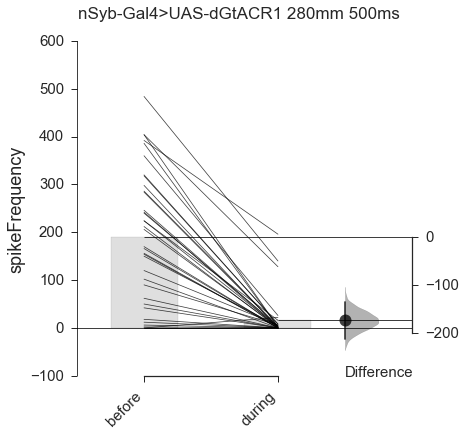

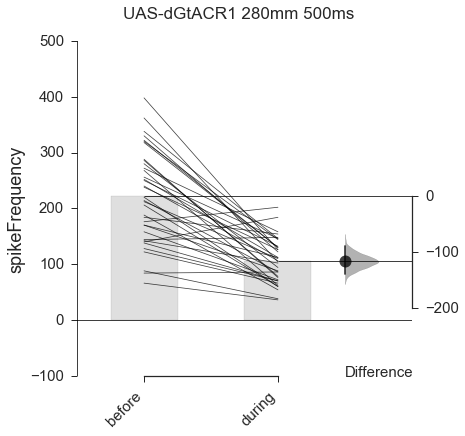

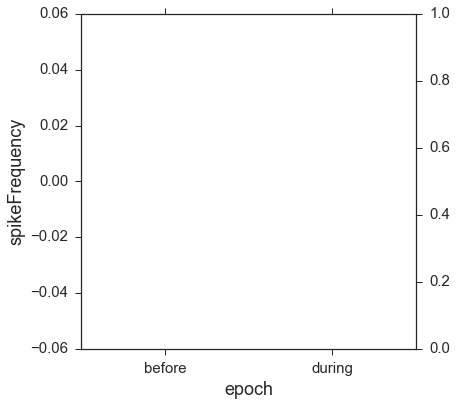

In [13]:
# Plot 500ms data.
contrastDict500msBefore = dict()

for illum in sc500ms['Illumination_mm'].unique():
    for genotype in sc500ms['Genotype'].unique():
        tempdf = sc500ms[ (sc500ms['Genotype'] == genotype) & (sc500ms['Illumination_mm'] == illum) ]
        
        fig, con = bs.pairedcontrast( tempdf, 
                                     x = 'epoch', y = 'spikeFrequency',
                                     idcol = 'Filename_pulseNum_traceNum',
                                     summaryBar = True,
                                     pal = myPal,
                                     idx = ('before', 'during') )
        contrastDict500msBefore[genotype] = con
        fig.suptitle(genotype+" "+illum+'mm 500ms', fontsize = 17)

In [ ]:
# Plot 500ms data.
contrastDict30sBefore = dict()

for genotype in sc30s['Genotype'].unique():
    fig, con = bs.pairedcontrast( sc30s[ sc30s['Genotype'] == genotype ], 
                                 x = 'epoch', y = 'spikeFrequency',
                                 hue = 'Illumination_mm',
                                 idcol = 'Filename_pulseNum_traceNum',
                                 summaryBar = True,
                                 pal = myPal,
                                 idx = ('before', 'during') )
    contrastDict30sBefore[genotype] = con
    fig.suptitle(genotype+' 30s', fontsize = 17)

In [ ]:
contrastDict500msBefore['nSyb-Gal4>UAS-dGtACR1']

In [ ]:
contrastDict30sBefore['nSyb-Gal4>UAS-dGtACR1']

In [ ]:
# Plot 500ms data.
contrastDict500msAfter = dict()

for genotype in sc500ms['Genotype'].unique():
    fig, con = bs.pairedcontrast( sc500ms[ sc500ms['Genotype'] == genotype ], 
                                 x = 'epoch', y = 'spikeFrequency',
                                 hue = 'Illumination_mm',
                                 idcol = 'Filename_pulseNum_traceNum',
                                 summaryBar = True,
                                 pal = myPal,
                                 idx = ('during', 'after') )
    contrastDict500msAfter[genotype] = con
    fig.suptitle(genotype+' 500ms', fontsize = 17)

In [ ]:
contrastDict500msAfter.keys()

In [ ]:
contrastDict500msAfter['nSyb-Gal4>UAS-dGtACR1']

In [ ]:
# Plot 500ms data.
contrastDict30sAfter = dict()

for genotype in sc30s['Genotype'].unique():
    fig, con = bs.pairedcontrast( sc30s[ sc30s['Genotype'] == genotype ], 
                                 x = 'epoch', y = 'spikeFrequency',
                                 hue = 'Illumination_mm',
                                 idcol = 'Filename_pulseNum_traceNum',
                                 summaryBar = True,
                                 pal = myPal,
                                 idx = ('during', 'after') )
    contrastDict30sAfter[genotype] = con
    fig.suptitle(genotype+' 30s', fontsize = 17)

In [ ]:
contrastDict30sAfter['nSyb-Gal4>UAS-dGtACR1']